In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-breed-identification/sample_submission.csv
/kaggle/input/dog-breed-identification/labels.csv
/kaggle/input/dog-breed-identification/test/09e51e17e2b756ff2ace8a87bd1443fa.jpg
/kaggle/input/dog-breed-identification/test/f7a32505c12649183c5991ecfa7d68b3.jpg
/kaggle/input/dog-breed-identification/test/bc6d50ffb4644feb34530aa58943e85b.jpg
/kaggle/input/dog-breed-identification/test/7cbc041e79135a572aad87904b5c9c57.jpg
/kaggle/input/dog-breed-identification/test/f3b603f10d6a344f0395fb46b242ff8e.jpg
/kaggle/input/dog-breed-identification/test/db55098d859d27a3c05b0e3fc41d43e7.jpg
/kaggle/input/dog-breed-identification/test/665bab06a3ea861c0812c778486988e3.jpg
/kaggle/input/dog-breed-identification/test/7b57911ea7559cebd6db308125926642.jpg
/kaggle/input/dog-breed-identification/test/df0d6ba158287cb2b3ed6459a22d42ba.jpg
/kaggle/input/dog-breed-identification/test/b80d89ad4a17ac2537ff46d251efcd7c.jpg
/kaggle/input/dog-breed-identification/test/06ecb29a374579fb320c1c7d2801cbe1.jp

In [2]:
%%time
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
import itertools 
import re
import matplotlib.pyplot as plt
%matplotlib inline

CPU times: user 1.73 s, sys: 521 ms, total: 2.25 s
Wall time: 5.08 s


In [3]:
%%time
train_dir = '../input/dog-breed-identification/train'
test_dir ='../input/dog-breed-identification/test'

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [4]:
%%time
def append_ext(fn):
    return fn+".jpg"
traindf = pd.read_csv('../input/dog-breed-identification/labels.csv',dtype=str)
testdf = pd.read_csv('../input/dog-breed-identification/sample_submission.csv',dtype=str)
traindf["id"] = traindf["id"].apply(append_ext)
testdf["id"] = testdf["id"].apply(append_ext)


CPU times: user 419 ms, sys: 40.7 ms, total: 459 ms
Wall time: 792 ms


# Training Labels

In [5]:
traindf.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07.jpg       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97.jpg             dingo
2  001cdf01b096e06d78e9e5112d419397.jpg          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d.jpg          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62.jpg  golden_retriever

# Test id or Sample Submission

In [6]:
testdf.head()

id        affenpinscher  \
0  000621fb3cbb32d8935728e48679680e.jpg  0.00833333333333333   
1  00102ee9d8eb90812350685311fe5890.jpg  0.00833333333333333   
2  0012a730dfa437f5f3613fb75efcd4ce.jpg  0.00833333333333333   
3  001510bc8570bbeee98c8d80c8a95ec1.jpg  0.00833333333333333   
4  001a5f3114548acdefa3d4da05474c2e.jpg  0.00833333333333333   

          afghan_hound  african_hunting_dog             airedale  \
0  0.00833333333333333  0.00833333333333333  0.00833333333333333   
1  0.00833333333333333  0.00833333333333333  0.00833333333333333   
2  0.00833333333333333  0.00833333333333333  0.00833333333333333   
3  0.00833333333333333  0.00833333333333333  0.00833333333333333   
4  0.00833333333333333  0.00833333333333333  0.00833333333333333   

  american_staffordshire_terrier          appenzeller   australian_terrier  \
0            0.00833333333333333  0.00833333333333333  0.00833333333333333   
1            0.00833333333333333  0.00833333333333333  0.00833333333333333   
2            0.00833333333333333  0.00833333333333333  0.00833333333333333   
3            0.00833333333333333  0.00833333333333333  0.00833333333333333   
4            0.00833333333333333  0.00833333333333333  0.00833333333333333   

               basenji               basset  ...           toy_poodle  \
0  0.00833333333333333  0.00833333333333333  ...  0.00833333333333333   
1  0.00833333333333333  0.00833333333333333  ...  0.00833333333333333   
2  0.00833333333333333  0.00833333333333333  ...  0.00833333333333333   
3  0.00833333333333333  0.00833333333333333  ...  0.00833333333333333   
4  0.00833333333333333  0.00833333333333333  ...  0.00833333333333333   

           toy_terrier               vizsla         walker_hound  \
0  0.00833333333333333  0.00833333333333333  0.00833333333333333   
1  0.00833333333333333  0.00833333333333333  0.00833333333333333   
2  0.00833333333333333  0.00833333333333333  0.00833333333333333   
3  0.00833333333333333  0.00833333333333333  0.00833333333333333   
4  0.00833333333333333  0.00833333333333333  0.00833333333333333   

            weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0  0.00833333333333333    0.00833333333333333         0.00833333333333333   
1  0.00833333333333333    0.00833333333333333         0.00833333333333333   
2  0.00833333333333333    0.00833333333333333         0.00833333333333333   
3  0.00833333333333333    0.00833333333333333         0.00833333333333333   
4  0.00833333333333333    0.00833333333333333         0.00833333333333333   

               whippet wire-haired_fox_terrier    yorkshire_terrier  
0  0.00833333333333333     0.00833333333333333  0.00833333333333333  
1  0.00833333333333333     0.00833333333333333  0.00833333333333333  
2  0.00833333333333333     0.00833333333333333  0.00833333333333333  
3  0.00833333333333333     0.00833333333333333  0.00833333333333333  
4  0.00833333333333333     0.00833333333333333  0.00833333333333333  

[5 rows x 121 columns]

# Training Images

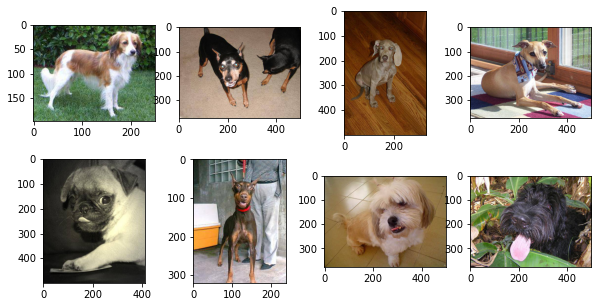

In [7]:

src_path = "../input/dog-breed-identification/train"
sub_class = os.listdir(src_path)

fig = plt.figure(figsize=(10,5))
for e in range(len(sub_class[:8])):
    plt.subplot(2,4,e+1)
    img = plt.imread(os.path.join(src_path,sub_class[e]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

# Data preprocessing

In [8]:
%%time
train_datagen=ImageDataGenerator( rescale=1./255.,
                                  #rotation_range = 20,
                                  #brightness_range=[0.2,1.0],
                                  #width_shift_range = 0.2,
                                  #height_shift_range = 0.2,
                                  #shear_range = 0.2,
                                  zoom_range = [0.7,1],
                                  horizontal_flip = True,
                                  #Setting validation split to 5% 
                                  validation_split=0.05 
                                  )

CPU times: user 29 µs, sys: 0 ns, total: 29 µs
Wall time: 31.9 µs


In [9]:
BATCH_SIZE = 32

In [10]:
train_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=train_dir,
x_col="id",
y_col="breed",
subset="training",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(224,224),
color_mode="rgb" 
)

Found 9711 validated image filenames belonging to 120 classes.


# Plotting Augmented images

In [11]:
x,y = next(train_generator)

In [12]:
print(type(x))
print(x.shape)
print(y.shape)

<class 'numpy.ndarray'>
(32, 224, 224, 3)
(32, 120)


In [13]:
def show_grid(image_list,nrows,ncols,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')
        

CPU times: user 1.44 s, sys: 13.7 ms, total: 1.46 s
Wall time: 1.46 s


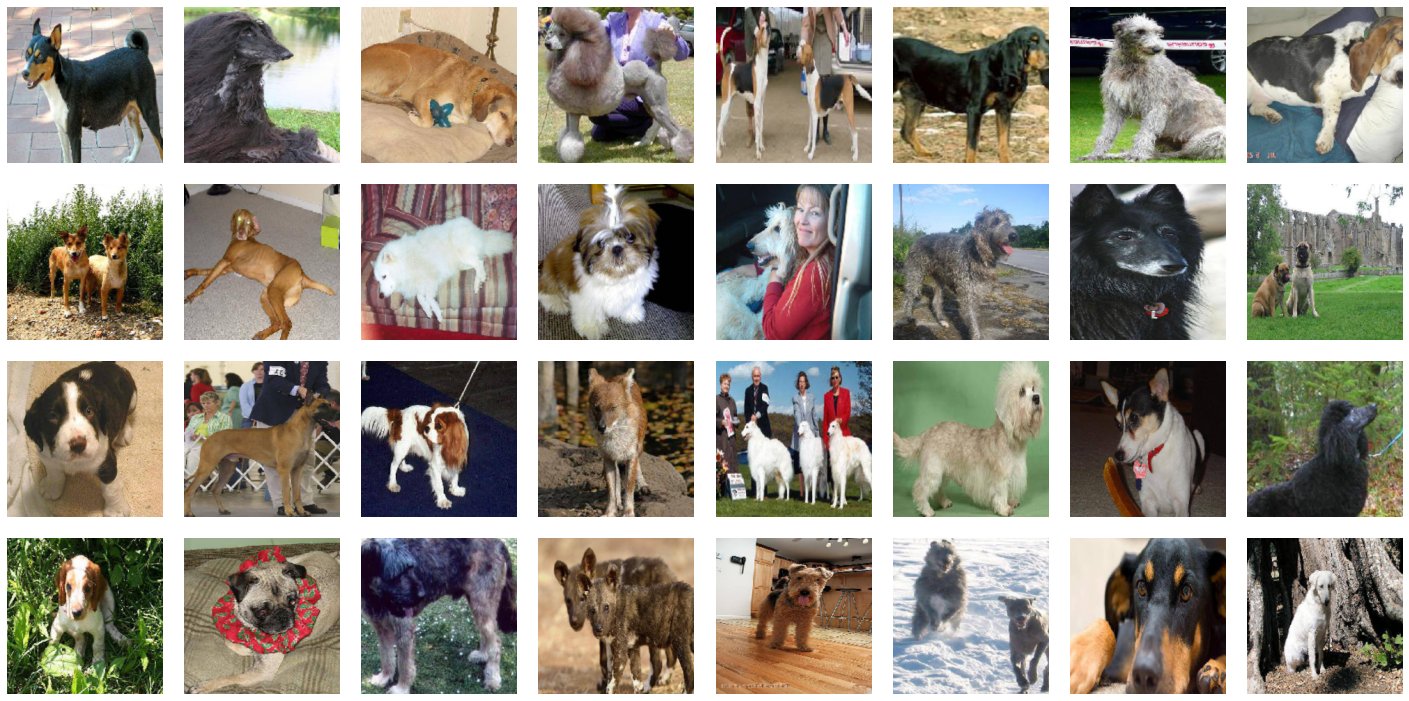

In [14]:
%%time
show_grid(x,4,8,figsize=(25,25))


# Validation Data

In [15]:
valid_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=train_dir,
x_col="id",
y_col="breed",
subset="validation",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(224,224),
color_mode="rgb")


Found 511 validated image filenames belonging to 120 classes.


# Test Data

In [16]:
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=testdf,
directory=test_dir,
x_col="id",
y_col=None,
batch_size=BATCH_SIZE,
seed=42,
shuffle=False,
class_mode=None,
target_size=(224,224),
color_mode="rgb")

Found 10357 validated image filenames.


# Pretrained model Resnet50V2

In [17]:
pretrained_model = tf.keras.applications.ResNet50V2(
        weights='imagenet',
        include_top=False ,
        input_shape=[224,224,3]
    )
pretrained_model.trainable = False
    
model = tf.keras.Sequential([ 
        pretrained_model,   
        tf.keras.layers.GlobalAveragePooling2D(),
        #tf.keras.layers.Dense(256, activation='relu'),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(120, activation='softmax')
    ])

94674944/94668760 [==============================] - 1s 0us/step


In [18]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.001)
opt=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9)
model.compile(optimizer = opt ,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               245880    
Total params: 23,810,680
Trainable params: 245,880
Non-trainable params: 23,564,800
_________________________________________________________________


# Early stopping

In [19]:
#reduce = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',factor=0.2,patience=5, min_lr=0.001 )

early = tf.keras.callbacks.EarlyStopping( patience=2,
                                          min_delta=0.001,
                                          restore_best_weights=True)

# Fitting the Model:

In [20]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=25,
                    callbacks=[early],)

Epoch 1/25
303/303 [==============================] - 181s 580ms/step - loss: 5.2629 - accuracy: 0.0169 - val_loss: 4.2091 - val_accuracy: 0.0812
Epoch 2/25
303/303 [==============================] - 135s 447ms/step - loss: 3.9740 - accuracy: 0.1312 - val_loss: 3.2426 - val_accuracy: 0.2854
Epoch 3/25
303/303 [==============================] - 135s 445ms/step - loss: 3.0897 - accuracy: 0.3200 - val_loss: 2.6224 - val_accuracy: 0.4021
Epoch 4/25
303/303 [==============================] - 134s 443ms/step - loss: 2.4904 - accuracy: 0.4447 - val_loss: 2.2109 - val_accuracy: 0.4896
Epoch 5/25
303/303 [==============================] - 135s 445ms/step - loss: 2.0811 - accuracy: 0.5365 - val_loss: 1.9177 - val_accuracy: 0.5229
Epoch 6/25
303/303 [==============================] - 137s 451ms/step - loss: 1.8144 - accuracy: 0.5921 - val_loss: 1.7022 - val_accuracy: 0.5958
Epoch 7/25
303/303 [==============================] - 136s 449ms/step - loss: 1.6135 - accuracy: 0.6301 - val_loss: 1.5503 -

# Loss and Accuracy Curves

In [21]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

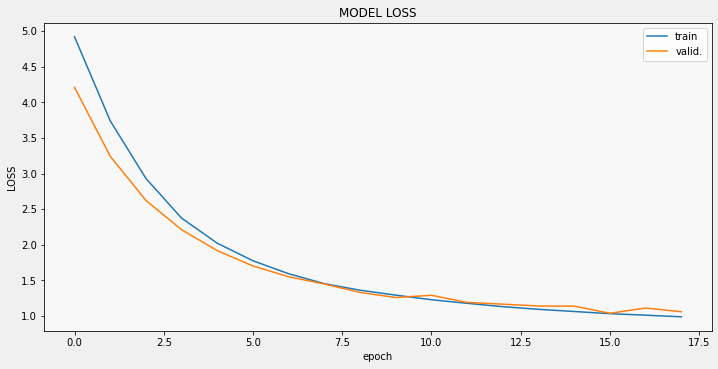

In [22]:
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)


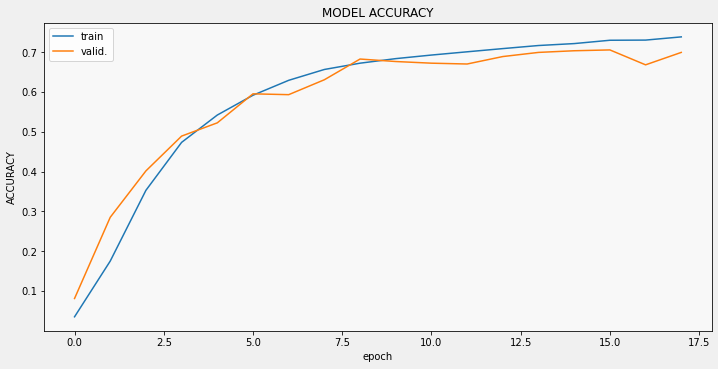

In [23]:
display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    211,
)


# Accuracy

In [24]:
score = model.evaluate(valid_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])



16/16 [==============================] - 7s 442ms/step - loss: 1.0767 - accuracy: 0.6986
Accuracy: 69.86%
Loss:  1.076697587966919


# Confusion Matrix  

In [25]:
from sklearn.metrics import f1_score, confusion_matrix

In [26]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.figure(figsize=(25,25))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

In [28]:
Y_pred = model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)

In [29]:
cm = confusion_matrix(valid_generator.classes,y_pred)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


Normalized confusion matrix


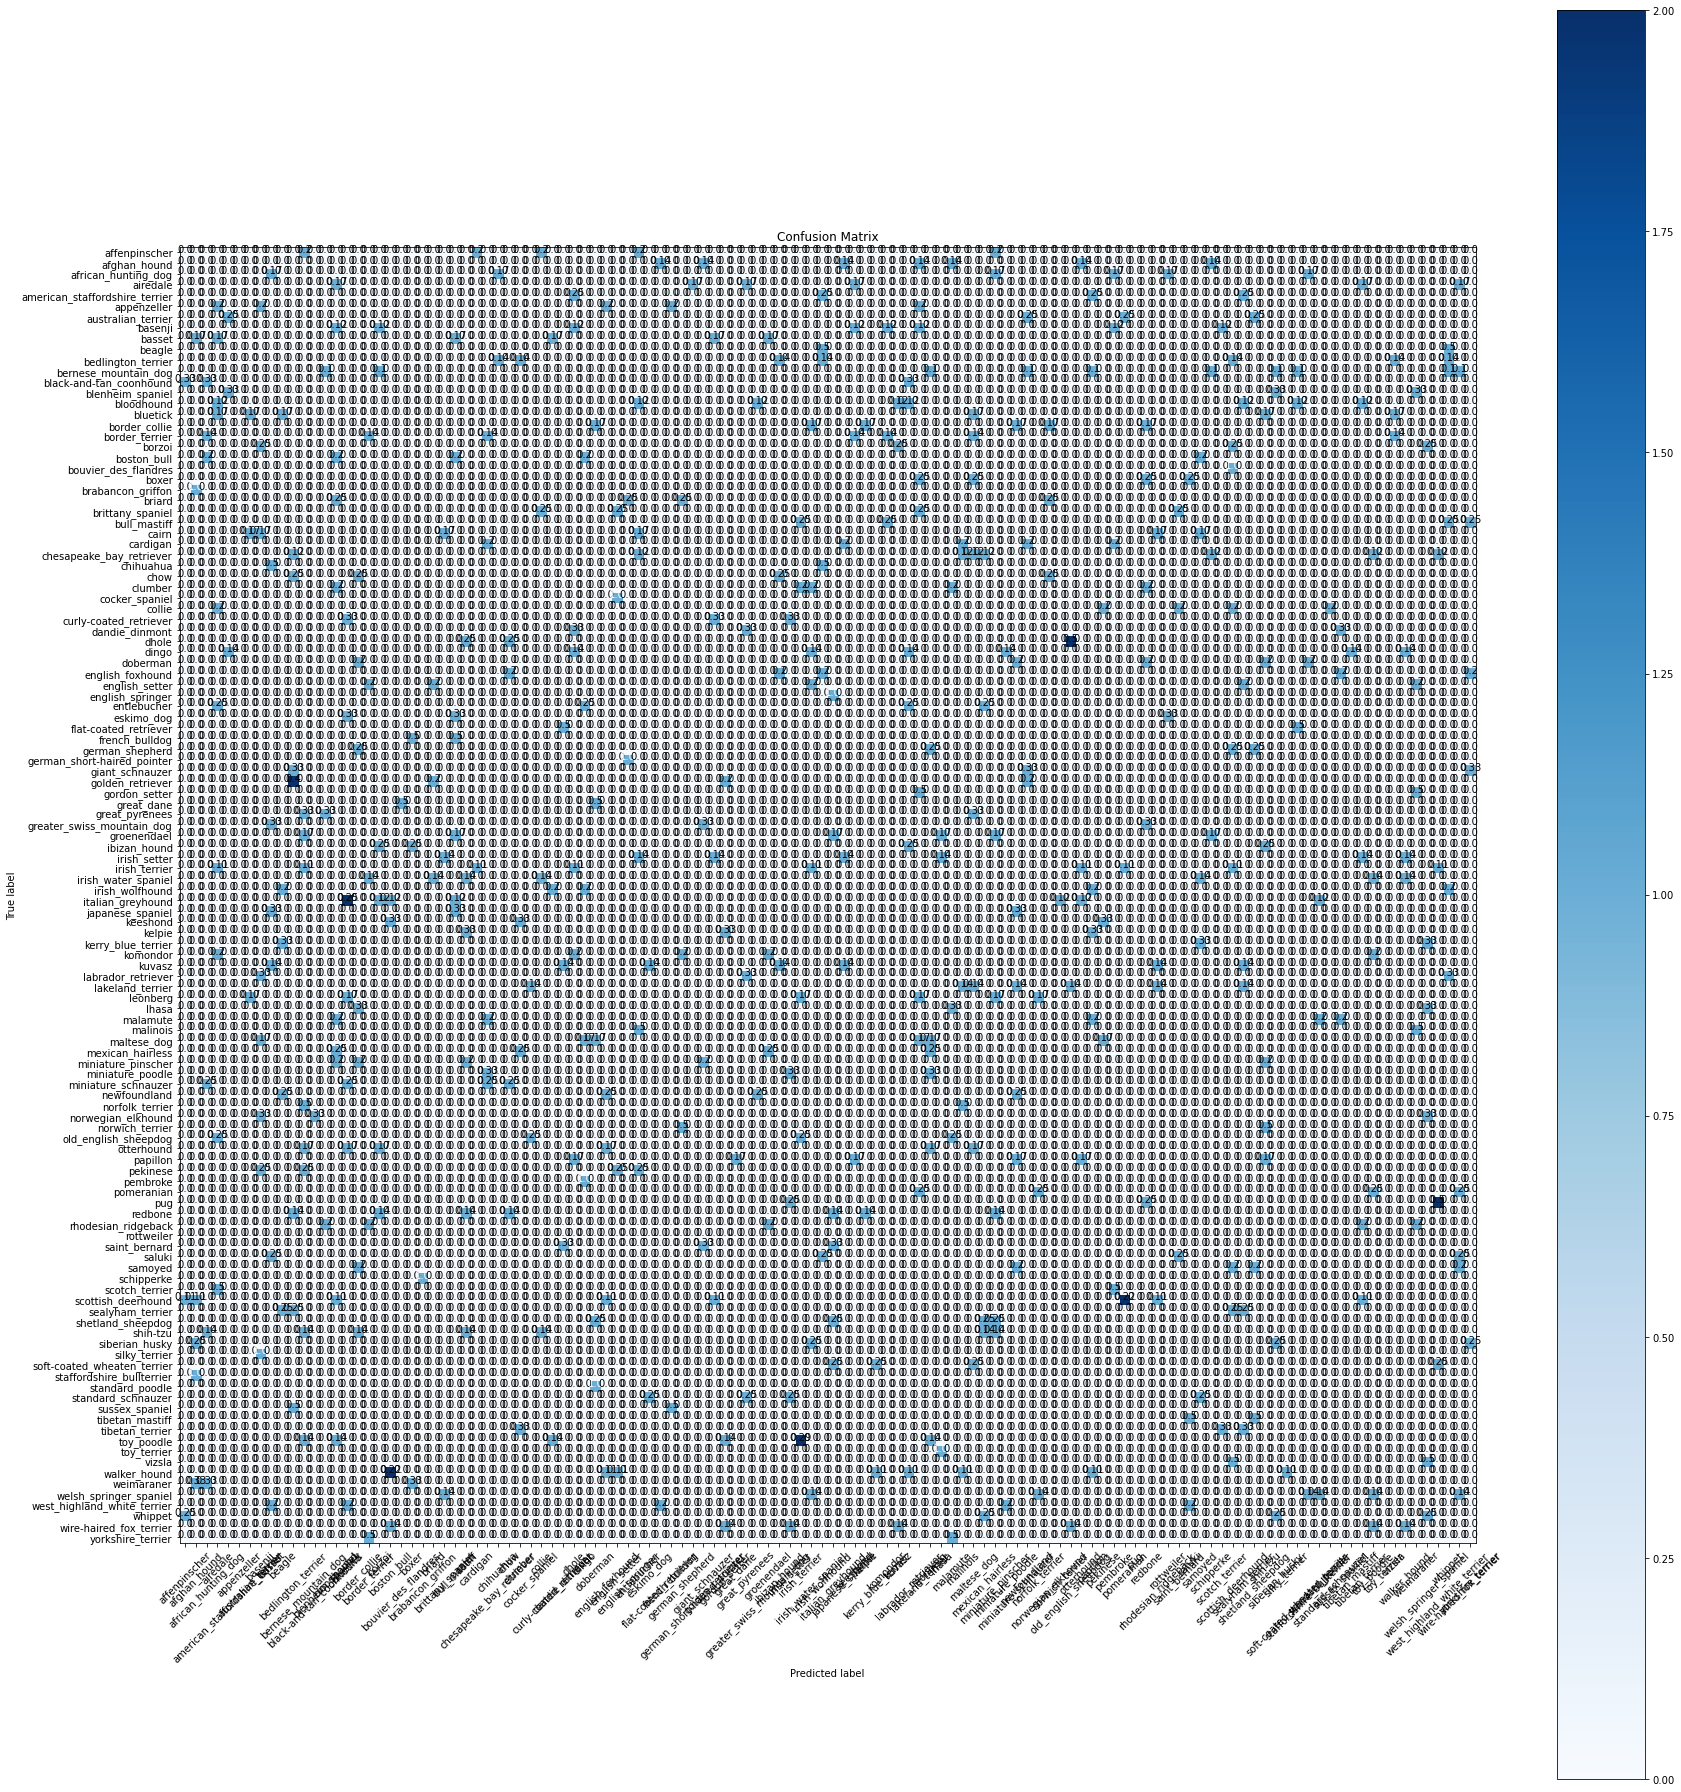

In [30]:
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

# F1 Score

In [31]:
f_score = f1_score(valid_generator.classes,y_pred,average='macro')
print('F1 score:',f_score)


F1 score: 0.004987373737373737


# Predicting Test Images

In [32]:
pred=model.predict(test_generator)

In [33]:
df_submission = pd.read_csv('/kaggle/input/dog-breed-identification/sample_submission.csv')
df_submission.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e       0.008333      0.008333   
1  00102ee9d8eb90812350685311fe5890       0.008333      0.008333   
2  0012a730dfa437f5f3613fb75efcd4ce       0.008333      0.008333   
3  001510bc8570bbeee98c8d80c8a95ec1       0.008333      0.008333   
4  001a5f3114548acdefa3d4da05474c2e       0.008333      0.008333   

   african_hunting_dog  airedale  american_staffordshire_terrier  appenzeller  \
0             0.008333  0.008333                        0.008333     0.008333   
1             0.008333  0.008333                        0.008333     0.008333   
2             0.008333  0.008333                        0.008333     0.008333   
3             0.008333  0.008333                        0.008333     0.008333   
4             0.008333  0.008333                        0.008333     0.008333   

   australian_terrier   basenji    basset  ...  toy_poodle  toy_terrier  \
0            0.008333  0.008333  0.008333  ...    0.008333     0.008333   
1            0.008333  0.008333  0.008333  ...    0.008333     0.008333   
2            0.008333  0.008333  0.008333  ...    0.008333     0.008333   
3            0.008333  0.008333  0.008333  ...    0.008333     0.008333   
4            0.008333  0.008333  0.008333  ...    0.008333     0.008333   

     vizsla  walker_hound  weimaraner  welsh_springer_spaniel  \
0  0.008333      0.008333    0.008333                0.008333   
1  0.008333      0.008333    0.008333                0.008333   
2  0.008333      0.008333    0.008333                0.008333   
3  0.008333      0.008333    0.008333                0.008333   
4  0.008333      0.008333    0.008333                0.008333   

   west_highland_white_terrier   whippet  wire-haired_fox_terrier  \
0                     0.008333  0.008333                 0.008333   
1                     0.008333  0.008333                 0.008333   
2                     0.008333  0.008333                 0.008333   
3                     0.008333  0.008333                 0.008333   
4                     0.008333  0.008333                 0.008333   

   yorkshire_terrier  
0           0.008333  
1           0.008333  
2           0.008333  
3           0.008333  
4           0.008333  

[5 rows x 121 columns]

In [34]:
file_list = test_generator.filenames
id_list = []
for name in file_list:
    m = re.sub('test/', '', name)
    m = re.sub('.jpg', '', m)
    id_list.append(m)

In [35]:
df_submission['id'] = id_list
df_submission.iloc[:,1:] = pred
df_submission.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e       0.001414      0.000040   
1  00102ee9d8eb90812350685311fe5890       0.000065      0.000072   
2  0012a730dfa437f5f3613fb75efcd4ce       0.000015      0.004393   
3  001510bc8570bbeee98c8d80c8a95ec1       0.005702      0.022678   
4  001a5f3114548acdefa3d4da05474c2e       0.069762      0.014975   

   african_hunting_dog  airedale  american_staffordshire_terrier  appenzeller  \
0             0.000005  0.000004                        0.000002     0.000003   
1             0.000096  0.000026                        0.000056     0.000165   
2             0.000268  0.000069                        0.000356     0.000031   
3             0.003627  0.001107                        0.009331     0.005619   
4             0.000245  0.000028                        0.000299     0.000013   

   australian_terrier   basenji    basset  ...  toy_poodle  toy_terrier  \
0            0.000013  0.000032  0.000014  ...    0.000068     0.000043   
1            0.000088  0.000084  0.000177  ...    0.000703     0.000114   
2            0.000038  0.000026  0.001406  ...    0.000237     0.000072   
3            0.001706  0.003900  0.002126  ...    0.014103     0.000968   
4            0.000150  0.000013  0.000071  ...    0.001431     0.000194   

     vizsla  walker_hound  weimaraner  welsh_springer_spaniel  \
0  0.000014      0.000006    0.000008                0.000011   
1  0.000098      0.000113    0.000025                0.000018   
2  0.000384      0.001087    0.002121                0.016581   
3  0.001065      0.000150    0.031665                0.000347   
4  0.000050      0.000051    0.000009                0.000094   

   west_highland_white_terrier   whippet  wire-haired_fox_terrier  \
0                     0.000003  0.000002                 0.000010   
1                     0.001118  0.000078                 0.000009   
2                     0.000161  0.006994                 0.000537   
3                     0.000654  0.006115                 0.000150   
4                     0.000143  0.000035                 0.000070   

   yorkshire_terrier  
0           0.000190  
1           0.000063  
2           0.000052  
3           0.002236  
4           0.003621  

[5 rows x 121 columns]

# Prediction Score for selected breeds

In [36]:
breeds=['id','beagle','chihuahua','doberman','french_bulldog', 'golden_retriever', 'malamute','pug','saint_bernard','scottish_deerhound','tibetan_mastiff']

In [37]:
selected_breeds = df_submission.loc[:,breeds]

In [38]:
print('Breeds and prediction score')
selected_breeds.head()

Breeds and prediction score


id    beagle  chihuahua  doberman  \
0  000621fb3cbb32d8935728e48679680e  0.000127   0.000473  0.000001   
1  00102ee9d8eb90812350685311fe5890  0.000166   0.000268  0.000025   
2  0012a730dfa437f5f3613fb75efcd4ce  0.000080   0.000135  0.000038   
3  001510bc8570bbeee98c8d80c8a95ec1  0.001157   0.003486  0.002959   
4  001a5f3114548acdefa3d4da05474c2e  0.000031   0.000076  0.000005   

   french_bulldog  golden_retriever  malamute       pug  saint_bernard  \
0        0.000096          0.000016  0.000115  0.000195       0.000051   
1        0.000124          0.000206  0.004810  0.000217       0.000029   
2        0.000108          0.017398  0.000075  0.000520       0.000369   
3        0.001289          0.000996  0.001570  0.069447       0.000285   
4        0.000130          0.000184  0.000195  0.008598       0.000490   

   scottish_deerhound  tibetan_mastiff  
0            0.000004         0.000016  
1            0.000146         0.000189  
2            0.001628         0.000423  
3            0.015093         0.014418  
4            0.000076         0.000133

# Final Submission to Competition

In [39]:
final_sub = df_submission.set_index('id')
final_sub.to_csv('Submission.csv')